In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 3
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
print(results.columns)
print(key_config_df.columns)

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

In [3]:
results

,experiment_id,client_to_server_latencies_avg,client_to_server_latencies_p99,client_to_server_latencies_p50,client_to_server_latencies_var,client_to_server_latencies_max,client_to_server_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,38,6.247001,11.406209,8.448806,19.508946,11.412226,0.018592,1.057938,2.600192,0.888862,...,8.890081e+08,1.900194e+14,9.242911e+08,8.876605e+08,0.142227,0.485798,0.084034,0.025386,0.487395,0.000000
1,55,0.168033,1.563760,0.024060,0.114880,1.829748,0.018898,0.429202,1.317887,0.386089,...,1.238045e+09,7.384372e+14,1.296474e+09,1.237606e+09,0.252222,0.481499,0.249033,0.019112,0.490829,0.031400
2,69,28.936934,59.022370,29.368105,274.760224,61.181720,0.043805,1.958660,3.781435,1.807419,...,1.601114e+09,2.886490e+11,1.601917e+09,1.600451e+09,0.171149,0.489160,0.130253,0.029230,0.495798,0.000000
3,36,134.773946,270.109538,132.358389,7552.943862,273.716078,0.035219,5.576047,13.182573,4.150814,...,9.781985e+08,3.343036e+11,9.795584e+08,9.775636e+08,0.133403,0.205139,0.151261,0.003357,0.210084,0.000000
4,6,29.334845,55.145296,30.468241,237.262893,55.721272,0.036118,1.769544,3.339717,1.699381,...,6.881075e+08,4.426211e+13,6.940303e+08,6.741320e+08,0.234734,0.487395,0.231092,0.023303,0.495798,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,39,1.185270,2.515569,1.208970,0.472985,2.590326,0.020350,0.864255,1.469876,0.806272,...,8.882954e+08,3.786249e+14,9.298862e+08,8.882954e+08,0.120588,0.477395,0.004202,0.025000,0.487395,0.000000
71,53,16.971790,29.646670,18.569120,75.543646,29.953894,0.046224,1.450881,2.449106,1.308492,...,1.290170e+09,2.060659e+11,1.290473e+09,1.289388e+09,0.175840,0.485798,0.147059,0.026207,0.487395,0.000000
72,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.303253e+09,3.763651e+14,1.340776e+09,1.267159e+09,0.054435,0.100840,0.050420,0.000316,0.100840,0.033613
73,34,151.939223,292.619124,152.882025,8045.033599,293.482909,0.045008,7.713452,13.905752,7.404521,...,9.748070e+08,1.993844e+15,9.756836e+08,8.505344e+08,0.100529,0.134454,0.117647,0.001329,0.142857,0.000000


<AxesSubplot: xlabel='cpu_request'>

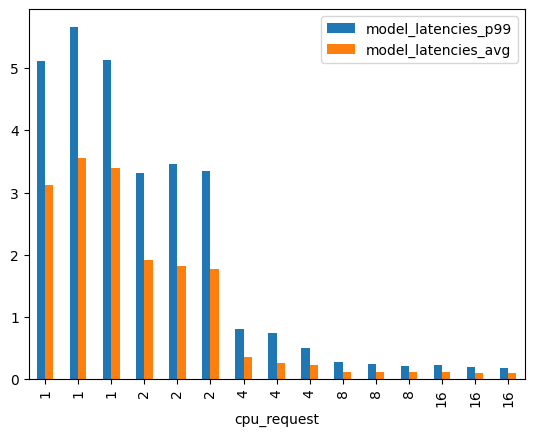

In [4]:
# resnet 18
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet18']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

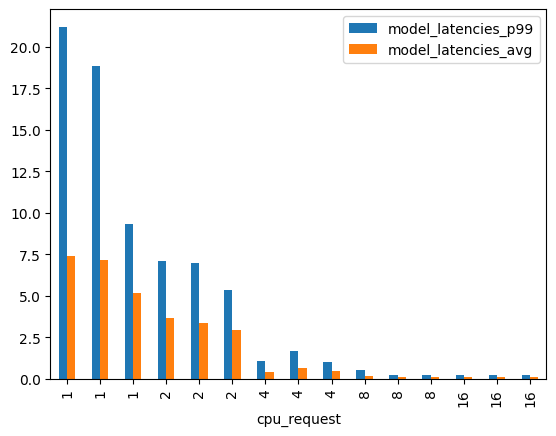

In [5]:
# resnet 34
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet34']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

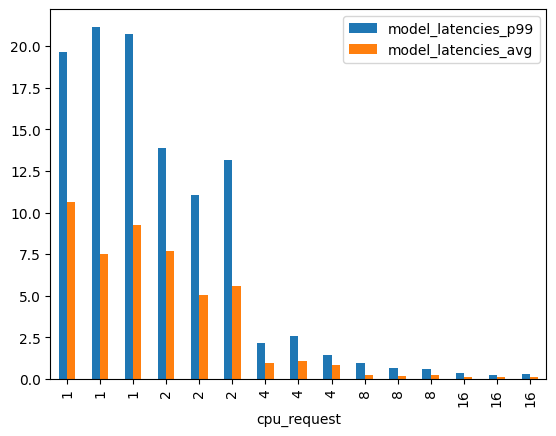

In [6]:
# resnet 50
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet50']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

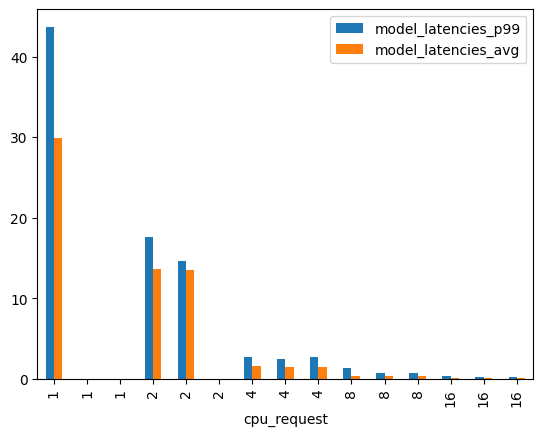

In [7]:
# resnet 101
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet101']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

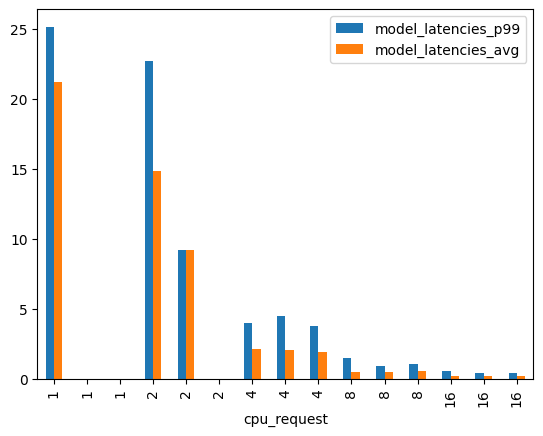

In [8]:
# resnet 152
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet152']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,60Gi,5.111307,91.417777,3.118001
1,resnet18,1,60Gi,5.663688,327.657433,3.548697
2,resnet18,1,60Gi,5.126259,556.241971,3.397096
3,resnet34,1,60Gi,21.203101,160.200809,7.422340
4,resnet34,1,60Gi,18.843051,682.905139,7.179353
5,resnet34,1,60Gi,9.345265,1188.943301,5.201723
6,resnet50,1,60Gi,19.642587,159.840784,10.639672
7,resnet50,1,60Gi,21.155063,693.889781,7.491439
8,resnet50,1,60Gi,20.705165,1263.498136,9.234762
9,resnet101,1,60Gi,43.675441,171.656645,29.924321


<AxesSubplot: xlabel='model_variant'>

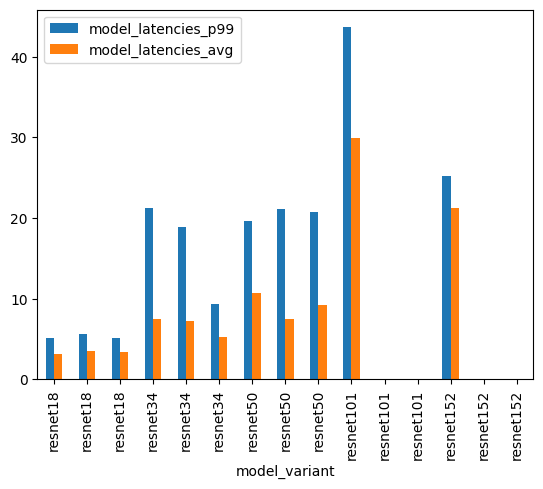

In [9]:
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == 1]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,memory_usage_max
0,resnet18,7.122616e+08
1,resnet18,7.166730e+08
2,resnet18,7.173530e+08
3,resnet34,8.595988e+08
4,resnet34,8.622940e+08
5,resnet34,8.635843e+08
6,resnet50,9.859154e+08
7,resnet50,9.983140e+08
8,resnet50,1.005855e+09
9,resnet101,1.287766e+09


<AxesSubplot: xlabel='model_variant'>

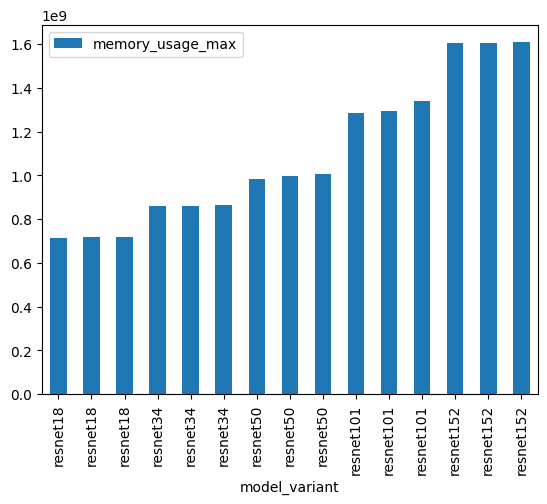

In [10]:
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == 1]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['memory_usage_max'])

,model_variant,memory_usage_var
0,resnet18,8.973661e+14
1,resnet18,2.096975e+12
2,resnet18,6.137809e+10
3,resnet34,4.991969e+14
4,resnet34,4.075607e+11
5,resnet34,3.933297e+11
6,resnet50,2.349805e+15
7,resnet50,2.836609e+13
8,resnet50,8.974376e+12
9,resnet101,3.043291e+14


<AxesSubplot: xlabel='model_variant'>

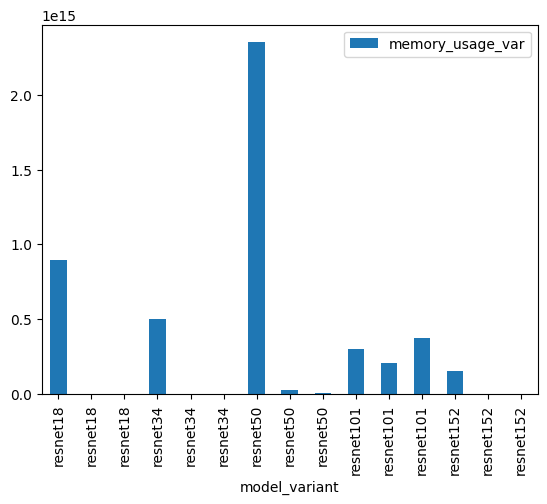

In [11]:
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == 1]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_var']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['memory_usage_var'])